Chapter 22
# 用等高线绘制几何体
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [2]:
# 导入包
import matplotlib.pyplot as plt
import numpy as np
import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 0. 可视化隐函数

In [3]:
def plot_implicit(fn, X_plot, Y_plot, Z_plot, ax, bbox):
    
    # 等高线的起止范围
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3

    ax.set_proj_type('ortho')
    
    # 绘制三条参考线
    k = 1.5
    ax.plot((xmin * k, xmax * k), (0, 0), (0, 0), 'k')
    ax.plot((0, 0), (ymin * k, ymax * k), (0, 0), 'k')
    ax.plot((0, 0), (0, 0), (zmin * k, zmax * k), 'k')
    
    # 等高线的分辨率
    A = np.linspace(xmin, xmax, 500) 
    # 产生网格数据
    A1,A2 = np.meshgrid(A,A)
    
    # 等高线的分割位置
    B = np.linspace(xmin, xmax, 20) 
    
    # 绘制 XY 平面等高线
    if X_plot == True:
        for z in B:
            X,Y = A1,A2
            Z = fn(X,Y,z)
            cset = ax.contour(X, Y, Z+z, [z], 
                              zdir='z', 
                              linewidths = 0.25,
                              colors = '#0066FF', 
                              linestyles = 'solid')

    # 绘制 XZ 平面等高线
    if Y_plot == True:
        for y in B: 
            X,Z = A1,A2
            Y = fn(X,y,Z)
            cset = ax.contour(X, Y+y, Z, [y], 
                              zdir='y', 
                              linewidths = 0.25,
                              colors = '#88DD66', 
                              linestyles = 'solid')
    
    # 绘制 YZ 平面等高线
    if Z_plot == True:
        for x in B: 
            Y,Z = A1,A2
            X = fn(x,Y,Z)
            cset = ax.contour(X+x, Y, Z, [x], 
                              zdir='x', 
                              linewidths = 0.25,
                              colors = '#FF6600', 
                              linestyles = 'solid')

    ax.set_zlim(zmin * k,zmax * k)
    ax.set_xlim(xmin * k,xmax * k)
    ax.set_ylim(ymin * k,ymax * k)
    ax.set_box_aspect([1,1,1]) 
    ax.view_init(azim=-120, elev=30)
    ax.axis('off')

def visualize_four_ways(fn, title, bbox=(-2.5,2.5)):
    
    fig = plt.figure(figsize=(10,4))
    
    ax = fig.add_subplot(1, 4, 1, projection='3d')
    plot_implicit(fn, True, False, False, ax, bbox)

    ax = fig.add_subplot(1, 4, 2, projection='3d')
    plot_implicit(fn, False, True, False, ax, bbox)
    
    ax = fig.add_subplot(1, 4, 3, projection='3d')
    plot_implicit(fn, False, False, True, ax, bbox)
    
    ax = fig.add_subplot(1, 4, 4, projection='3d')
    plot_implicit(fn, True, True, True, ax, bbox)
    
    fig.savefig('Figures/' + title + '.svg', format='svg')

# 参考:
# https://stackoverflow.com/questions/4680525/plotting-implicit-equations-in-3d  

### 1. 单位球
参考： 
https://mathworld.wolfram.com/QuadraticSurface.html  
https://tutorial.math.lamar.edu/classes/calciii/quadricsurfaces.aspx

$x^2 + y^2 + z^2 - 1 = 0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


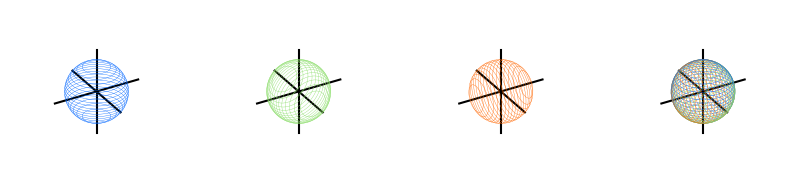

In [4]:
def unit_sphere(x,y,z):
    
    return x**2 + y**2 + z**2 - 1

visualize_four_ways(unit_sphere, '单位球', bbox = (-1,1))

### 2. 椭球

$\frac{x^2}{a^2} + \frac{y^2}{b^2} + \frac{z^2}{c^2} - 1 = 0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


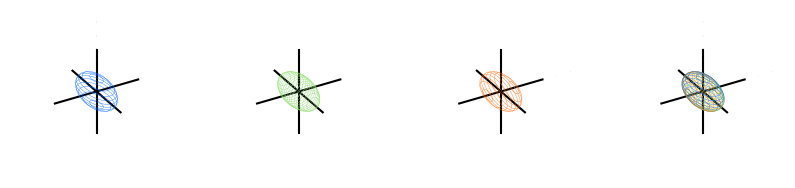

In [5]:
# Ellipsoid
def Ellipsoid(x,y,z):
    a = 1
    b = 2
    c = 1
    return x**2/a**2 + y**2/b**2 + z**2/c**2 - 1

visualize_four_ways(Ellipsoid, '椭球', bbox = (-2,2))

### 3. 双曲抛物面
双曲抛物面是一个二次曲面，其形状像一个双曲面和抛物面的组合。

$\frac{x^2}{a^2} - \frac{y^2}{b^2} - z = 0$

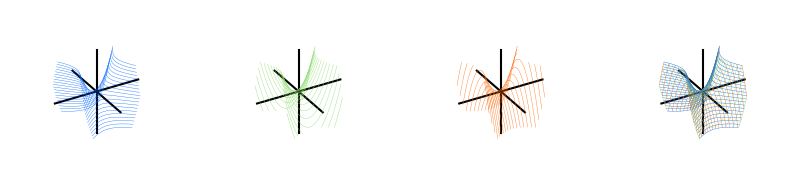

In [6]:
# Hyperbolic_paraboloid
def Hyperbolic_paraboloid(x,y,z):
    a = 1
    b = 1
    
    return x**2/a**2 - y**2/b**2 - z

visualize_four_ways(Hyperbolic_paraboloid, '双曲抛物面', bbox = (-2,2))

### 4. 旋转双曲抛物面

$xy - z = 0$

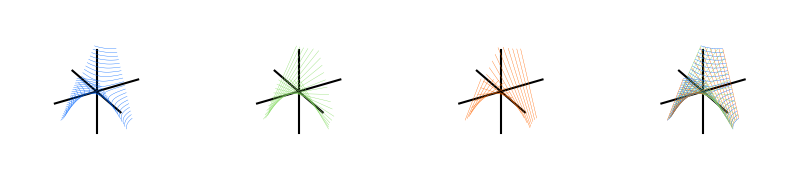

In [7]:
# Hyperbolic_paraboloid, rotated
def Hyperbolic_paraboloid_rotated(x,y,z):
    
    return x*y - z

visualize_four_ways(Hyperbolic_paraboloid_rotated, '旋转双曲抛物面', bbox = (-2,2))

### 5A. 正圆抛物面，开口朝上

$x^2 + y^2 -z -2 = 0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


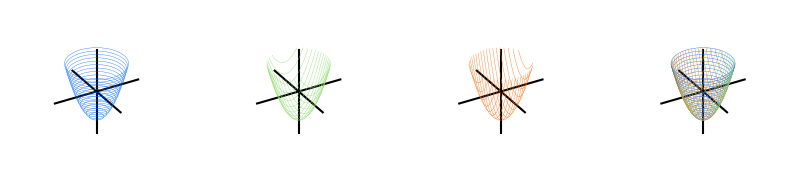

In [8]:
#  Circular paraboloid
def circular_paraboloid(x,y,z):
    
    return x**2 + y**2 - 2 - z

visualize_four_ways(circular_paraboloid, '正圆抛物面，开口朝上', bbox = (-2,2))


### 5B. 正圆抛物面，开口朝下

$x^2 + y^2 + z -2 = 0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


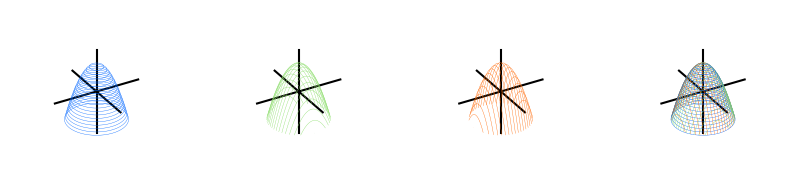

In [9]:
#  Circular paraboloid
def circular_paraboloid(x,y,z):
    
    return x**2 + y**2 - 2 + z

visualize_four_ways(circular_paraboloid, '正圆抛物面，开口朝下', bbox = (-2,2))


### 5C. 正圆抛物面，x轴

$y^2 + z^2 - x - 2 = 0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


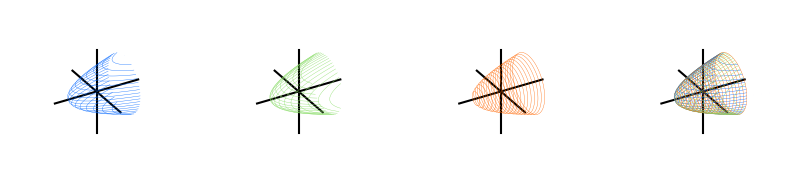

In [10]:
#  Circular paraboloid
def circular_paraboloid(x,y,z):
    
    return y**2 + z**2 - 2 - x

visualize_four_ways(circular_paraboloid, '正圆抛物面，开口沿x轴', bbox = (-2,2))

### 5C. 正圆抛物面，y轴

$x^2 + z^2 - y - 2 = 0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


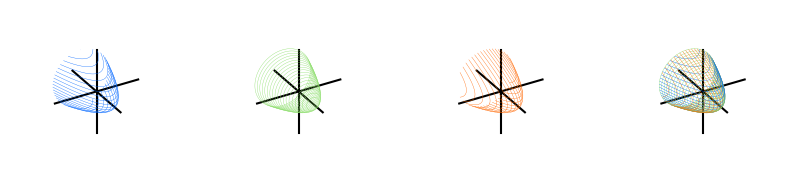

In [11]:
#  Circular paraboloid
def circular_paraboloid(x,y,z):
    
    return x**2 + z**2 - 2 - y

visualize_four_ways(circular_paraboloid, '正圆抛物面，开口沿y轴', bbox = (-2,2))

### 6A. 单叶双曲面，z轴

$x^2 + y^2 - z^2 - 2 = 0$

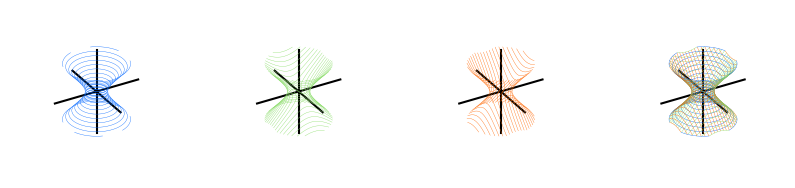

In [12]:
#  Hyperboloid of revolution of one sheet (special case of hyperboloid of one sheet)
def Hyperboloid_1_sheet(x,y,z):
    
    return x**2 + y**2 - z**2 - 2

visualize_four_ways(Hyperboloid_1_sheet, '单叶双曲面，z轴', bbox = (-4,4))

### 6B. 单叶双曲面，y轴

$x^2 - y^2 + z^2 - 2 = 0$

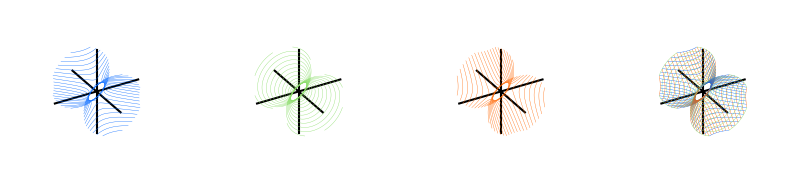

In [13]:
#  Hyperboloid of revolution of one sheet (special case of hyperboloid of one sheet)
def Hyperboloid_1_sheet(x,y,z):
    
    return x**2 - y**2 + z**2 - 2

visualize_four_ways(Hyperboloid_1_sheet, '单叶双曲面，y轴', bbox = (-4,4))

### 6C. 单叶双曲面，x轴

$-x^2 + y^2 + z^2 - 2 = 0$

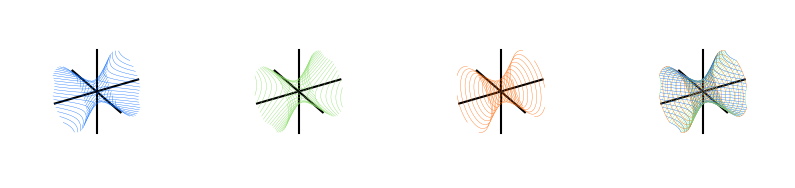

In [14]:
#  Hyperboloid of revolution of one sheet (special case of hyperboloid of one sheet)
def Hyperboloid_1_sheet(x,y,z):
    
    return - x**2 + y**2 + z**2 - 2

visualize_four_ways(Hyperboloid_1_sheet, '单叶双曲面，x轴', bbox = (-4,4))

### 7A. 双叶双曲面，z轴

$x^2 + y^2 - z^2 +1 = 0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


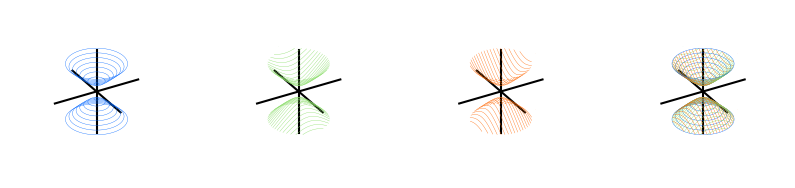

In [15]:
#  Hyperboloid of revolution of two sheets 
def Hyperboloid_2_sheets(x,y,z):
    
    return x**2 + y**2 - z**2 + 1

visualize_four_ways(Hyperboloid_2_sheets, '双叶双曲面，z轴', bbox = (-4,4))

### 7B. 双叶双曲面，y轴

$x^2 - y^2 + z^2 + 2 = 0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


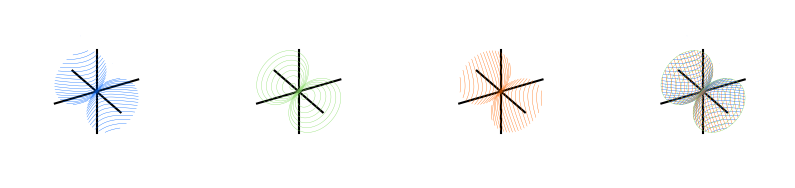

In [16]:
#  Hyperboloid of revolution of two sheets 
def Hyperboloid_2_sheets(x,y,z):
    
    return x**2 - y**2 + z**2 + 2

visualize_four_ways(Hyperboloid_2_sheets, '双叶双曲面，y轴', bbox = (-4,4))

### 7C. 双叶双曲面，x轴

$-x^2 + y^2 + z^2 + 1 = 0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


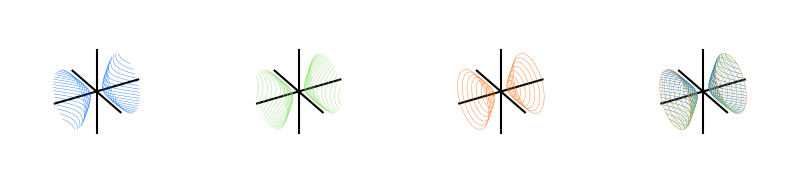

In [17]:
#  Hyperboloid of revolution of two sheets 
def Hyperboloid_2_sheets(x,y,z):
    
    return - x**2 + y**2 + z**2 + 1

visualize_four_ways(Hyperboloid_2_sheets, '双叶双曲面，x轴', bbox = (-4,4))

### 8A. 圆锥面，z轴

$x^2 + y^2 - z^2= 0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


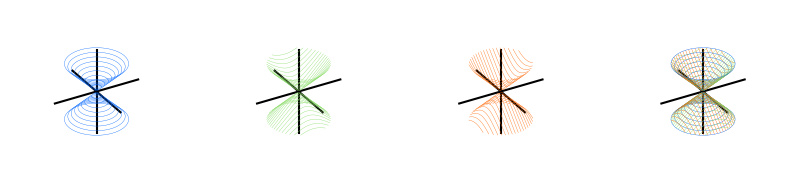

In [18]:
#    Circular cone
def Circular_cone(x,y,z):
    
    return x**2 + y**2 - z**2

visualize_four_ways(Circular_cone, '圆锥面', bbox = (-4, 4))

### 8B. 圆锥面，y轴

$x^2 - y^2 + z^2= 0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


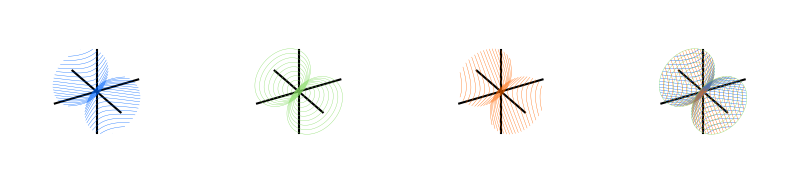

In [19]:
#    Circular cone
def Circular_cone(x,y,z):
    
    return x**2 - y**2 + z**2

visualize_four_ways(Circular_cone, '圆锥面_y_轴', bbox = (-4, 4))

### 8C. 圆锥面，x轴

$-x^2 + y^2 + z^2= 0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],


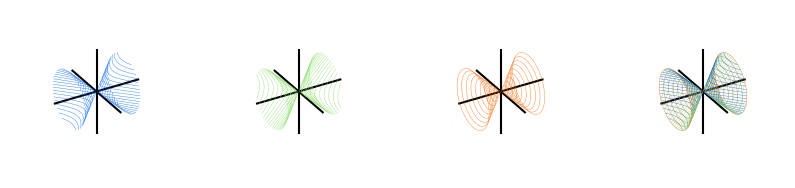

In [20]:
#    Circular cone
def Circular_cone(x,y,z):
    
    return -x**2 + y**2 + z**2

visualize_four_ways(Circular_cone, '圆锥面_x_轴', bbox = (-4, 4))

### 9A. 圆柱面，z轴

$x^2 + y^2 - 1 = 0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


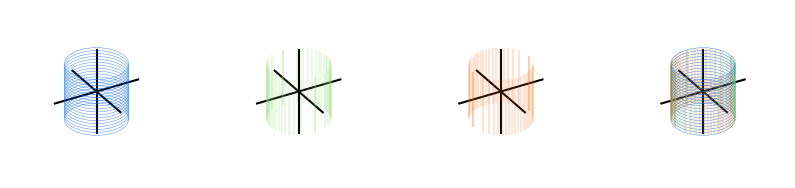

In [21]:
#    Circular cylinder 
def Circular_cylinder(x,y,z):
    
    return x**2 + y**2 - 1

visualize_four_ways(Circular_cylinder, '圆柱面，z轴', bbox = (-1,1))
    

### 9B. 圆柱面，y轴

$x^2 + z^2 - 1= 0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


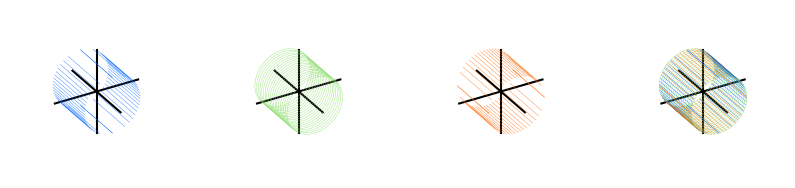

In [22]:
#    Circular cylinder 
def Circular_cylinder(x,y,z):
    
    return x**2 + z**2 - 1

visualize_four_ways(Circular_cylinder, '圆柱面，y轴', bbox = (-1,1))
    

### 9C. 圆柱面，x轴

$y^2 + z^2 - 1= 0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],


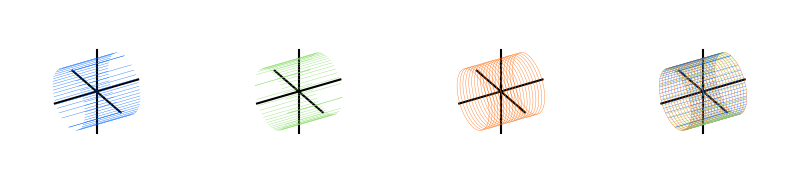

In [23]:
#    Circular cylinder 
def Circular_cylinder(x,y,z):
    
    return y**2 + z**2 - 1

visualize_four_ways(Circular_cylinder, '圆柱面，x轴', bbox = (-1,1))


### 10. 古尔萨特结
Goursat tangle 是一种三维几何结构，它是由两个或多个交织在一起的圆环或曲线组成的。Goursat tangle 最早由法国数学家 Edmond Goursat 在研究微分几何和复分析时提出，因此得名。它的几何结构非常复杂，具有多个不同的交叉点和曲线段，因此很难用简单的数学公式来描述。

Goursat tangle 在数学和物理学中有广泛的应用，比如可以用来描述材料的结构和形态、量子场论中的路径积分等。此外，Goursat tangle 也是一种非常有趣的艺术形式，因为它的复杂性和美丽性质，很多人喜欢用不同的材料和技术来制作和展示它。

$x^4+y^4+z^4+a(x^2+y^2+z^2)^2+b(x^2+y^2+z^2)+c= 0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


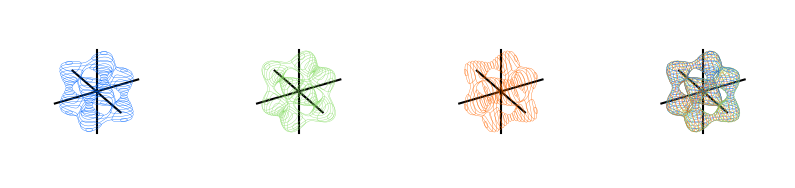

In [24]:
def Tanglecube(x,y,z):
    a,b,c = 0.0,-5.0,11.8
    return x**4+y**4+z**4+a*(x**2+y**2+z**2)**2+b*(x**2+y**2+z**2)+c

visualize_four_ways(Tanglecube, '古尔萨特结')

# 参考：
# https://mathworld.wolfram.com/Tanglecube.html

### 11. 心形

$(x^2 + 9/4y^2 + z^2 - 1)^3 - x^2z^3 - 9/80 y^2 z^3 = 0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


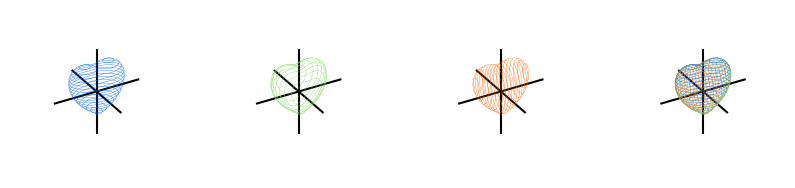

In [27]:
def heart(x,y,z):
    
    return (x**2 + 9/4*y**2 + z**2 - 1)**3 - x**2*z**3 - 9/80 * y**2 * z**3

visualize_four_ways(heart, '心形', (-1.2,1.2))

### 12. 环面
参考：
https://en.wikipedia.org/wiki/Implicit_surface

$(x^2 + y^2 + z^2 + R^2 - a^2)^2 - 4R^2(x^2 + z^2)=0$

C:\Users\james\AppData\Local\Temp\ipykernel_3600\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],


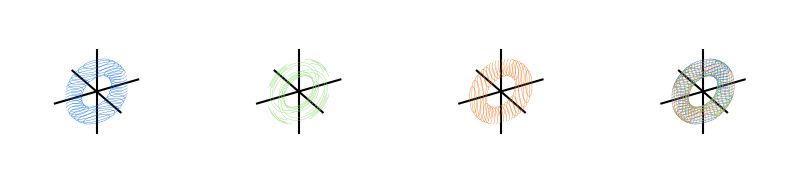

In [26]:
def Torus(x,y,z):
    
    R = 2.5
    a = 0.8
    
    return (x**2 + y**2 + z**2 + R**2 - a**2)**2 - 4*R**2*(x**2 + z**2)

visualize_four_ways(Torus, '环面', (-3,3))

### 范数

C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


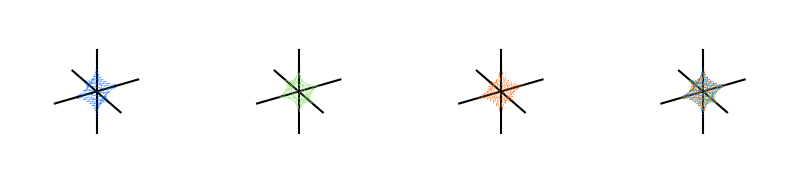

In [9]:
def vector_norm(x,y,z):
    
    p = 0.6
    # 非范数。Lp范数，p >=1 
    
    return (np.abs(x)**p + np.abs(y)**p + np.abs(z)**p)**(1/p) - 1

visualize_four_ways(vector_norm, 'norm_0.6', bbox = (-1,1))

C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


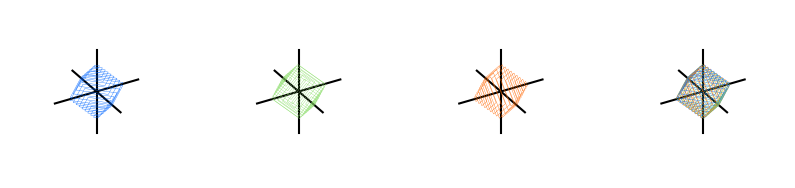

In [10]:
def vector_norm(x,y,z):
    
    p = 1
    
    return (np.abs(x)**p + np.abs(y)**p + np.abs(z)**p)**(1/p) - 1

visualize_four_ways(vector_norm, 'norm_1', bbox = (-1,1))

C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


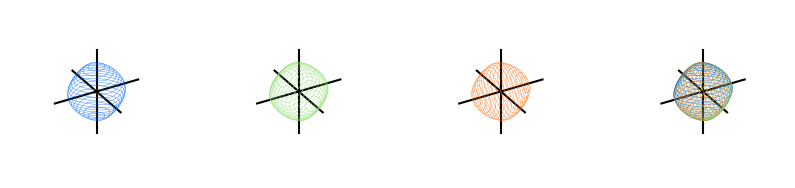

In [5]:
def vector_norm(x,y,z):
    
    p = 1.5
    
    return (np.abs(x)**p + np.abs(y)**p + np.abs(z)**p)**(1/p) - 1

visualize_four_ways(vector_norm, 'norm_1.5', bbox = (-1,1))

C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


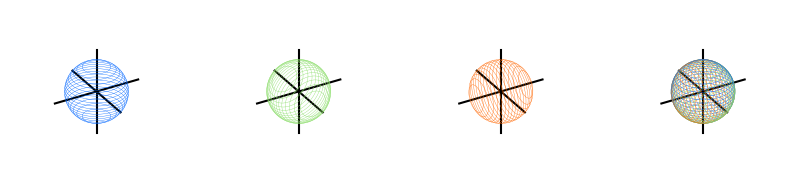

In [6]:
def vector_norm(x,y,z):
    
    p = 2
    
    return (np.abs(x)**p + np.abs(y)**p + np.abs(z)**p)**(1/p) - 1

visualize_four_ways(vector_norm, 'norm_2', bbox = (-1,1))

C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


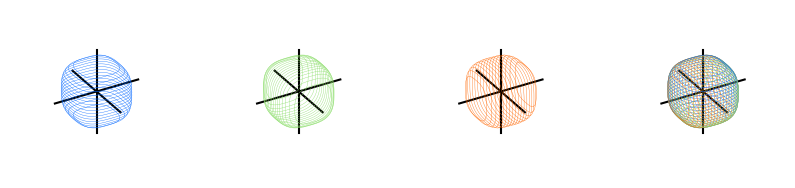

In [7]:
def vector_norm(x,y,z):
    
    p = 3
    
    return (np.abs(x)**p + np.abs(y)**p + np.abs(z)**p)**(1/p) - 1

visualize_four_ways(vector_norm, 'norm_3', bbox = (-1,1))

C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:27: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z],
C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:38: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y],
C:\Users\james\AppData\Local\Temp\ipykernel_3928\2907639625.py:49: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x],


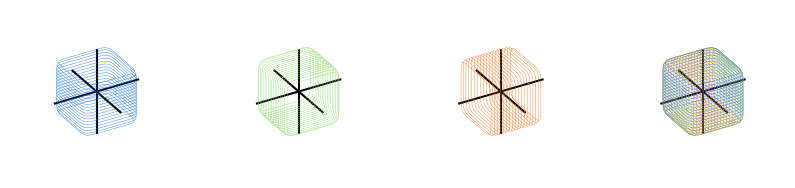

In [8]:
def vector_norm(x,y,z):
    
    p = 8
    
    return (np.abs(x)**p + np.abs(y)**p + np.abs(z)**p)**(1/p) - 1

visualize_four_ways(vector_norm, 'norm_8', bbox = (-1,1))

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023